## Step 1: Load and Preprocess the Data

In [1]:
import tensorflow as tf
import plotly.graph_objects as go

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to a range between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding (optional, but may be useful for certain models)
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=10)


## Step 2: Data Visualization using Plotly

In [2]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Count the number of samples for each digit in the training set
digit_counts_train = [sum(y_train == i) for i in range(10)]

# Create a bar chart to visualize the distribution of digits in the training set
fig = go.Figure(data=go.Bar(x=list(range(10)), y=digit_counts_train))
fig.update_layout(title="Digit Distribution in Training Set", xaxis_title="Digit", yaxis_title="Count")
fig.show()

# Create subplots for each digit to display sample images
fig = make_subplots(rows=2, cols=5, subplot_titles=[f"Digit {i}" for i in range(10)],
                    horizontal_spacing=0.05, vertical_spacing=0.1)

# Add sample images for each digit to the subplots
for i in range(10):
    sample_images = x_train[y_train == i][:5]  # Get 5 images of each digit
    for j, img in enumerate(sample_images, 1):
        fig.add_trace(go.Heatmap(z=img, colorscale='gray'), row=(j // 5) + 1, col=(j % 5) + 1)

# Set subplot axis properties
for i in range(1, 11):
    fig.update_xaxes(showticklabels=False, visible=False, row=i, col=1)
    fig.update_yaxes(showticklabels=False, visible=False, row=i, col=1)


## Step 3: Build the Neural Network Model

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D array
    tf.keras.layers.Dense(128, activation='relu'),   # Hidden layer with 128 neurons and ReLU activation
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 0 to 9) and softmax activation
])


## Step 4: Compile the Model



In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # For non-one-hot encoded labels
              metrics=['accuracy'])


## Step 5: Train the Model

In [5]:
# Training the model on the preprocessed data
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2583 - accuracy: 0.9258 - val_loss: 0.1355 - val_accuracy: 0.9594
Epoch 2/10
1875/1875 [==============================] - 2s 928us/step - loss: 0.1113 - accuracy: 0.9668 - val_loss: 0.0996 - val_accuracy: 0.9696
Epoch 3/10
1875/1875 [==============================] - 2s 949us/step - loss: 0.0761 - accuracy: 0.9772 - val_loss: 0.0901 - val_accuracy: 0.9707
Epoch 4/10
1875/1875 [==============================] - 2s 987us/step - loss: 0.0561 - accuracy: 0.9829 - val_loss: 0.0818 - val_accuracy: 0.9755
Epoch 5/10
1875/1875 [==============================] - 2s 980us/step - loss: 0.0435 - accuracy: 0.9864 - val_loss: 0.0750 - val_accuracy: 0.9765
Epoch 6/10
1875/1875 [==============================] - 2s 952us/step - loss: 0.0334 - accuracy: 0.9898 - val_loss: 0.0742 - val_accuracy: 0.9771
Epoch 7/10
1875/1875 [==============================] - 2s 988us/step - loss: 0.0277 - accuracy: 0.9912 - val_loss: 0.0721 - v

## Step 6: Evaluate the Model



In [6]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')


313/313 [==============================] - 0s 675us/step - loss: 0.0811 - accuracy: 0.9789
Test accuracy: 0.9789000153541565


In [7]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_number = 1
while os.path.isfile(f"custom_png{image_number}.png"):
    try:
        img = cv2.imread(f"Users/debma/Downloads/custom_png/digit{image_number}.png", cv2.IMREAD_GRAYSCALE)
        img = np.invert(img)
        img = img.reshape(1, 28, 28) / 255.0  # Reshape and normalize the image
        prediction = model.predict(img)
        predicted_label = np.argmax(prediction)

        print(f"Image {image_number}: This digit is probably a {predicted_label}")

        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except Exception as e:
        print(f"Error processing image {image_number}: {e}")
    finally:
        image_number += 1


In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10)

# Evaluate the model
model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1526 - accuracy: 0.9546
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0540 - accuracy: 0.9834
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0387 - accuracy: 0.9882
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0304 - accuracy: 0.9904
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0234 - accuracy: 0.9925
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0184 - accuracy: 0.9940
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0148 - accuracy: 0.9955
Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0123 - accuracy: 0.9957
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0090 - accuracy: 0.9971
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss

[0.03464118018746376, 0.9908000230789185]

## Saving the Model


In [10]:
# Save the trained model
model.save('trained_model.h5')

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



# Performing Hyperparameter Tuning through Grid Search

In [11]:
pip install tensorflow 2.x

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement 2.x (from versions: none)
ERROR: No matching distribution found for 2.x

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
pip install --upgrade keras


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
def create_model(learning_rate=0.001, batch_size=32):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [14]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from kerastuner.tuners import RandomSearch

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the CNN model using a function
def build_model(hp):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=16),
                                     kernel_size=hp.Choice('conv1_kernel', values=[3, 5]),
                                     activation='relu',
                                     input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Conv2D(filters=hp.Int('conv2_filters', min_value=32, max_value=64, step=16),
                                     kernel_size=hp.Choice('conv2_kernel', values=[3, 5]),
                                     activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

    # Compile the model with different learning rates
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[0.001, 0.01, 0.1])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Number of hyperparameter combinations to try
    executions_per_trial=2,  # Number of models that should be built and fit for each trial
    directory='my_tuner_directory',  # Directory to store the tuning results
    project_name='mnist_tuning'  # Name of the project
)

# Perform the hyperparameter search
tuner.search(x=x_train,
             y=y_train,
             epochs=10,
             batch_size=32,
             validation_data=(x_test, y_test))

# Get the best hyperparameters and model
best_params = tuner.get_best_hyperparameters()[0].values
best_model = tuner.get_best_models(num_models=1)[0]

print("Best Hyperparameters:", best_params)


C:\Users\debma\AppData\Local\Temp\ipykernel_23636\3865949840.py:3: DeprecationWarning:

`import kerastuner` is deprecated, please use `import keras_tuner`.



INFO:tensorflow:Reloading Tuner from my_tuner_directory\mnist_tuning\tuner0.json
INFO:tensorflow:Oracle triggered exit
Best Hyperparameters: {'conv1_filters': 64, 'conv1_kernel': 3, 'conv2_filters': 48, 'conv2_kernel': 3, 'learning_rate': 0.001}


In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from kerastuner.tuners import RandomSearch

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the CNN model using a function
def build_model(hp):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=16),
                                     kernel_size=hp.Choice('conv1_kernel', values=[3, 5]),
                                     activation='relu',
                                     input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Conv2D(filters=hp.Int('conv2_filters', min_value=32, max_value=64, step=16),
                                     kernel_size=hp.Choice('conv2_kernel', values=[3, 5]),
                                     activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

    # Compile the model with different learning rates
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[0.001, 0.01, 0.1])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,  # Reduce max_trials for demonstration, increase it for more hyperparameter combinations
    executions_per_trial=3,  # Increase executions_per_trial for more stable performance estimates
    directory='my_tuner_directory',
    project_name='mnist_tuning'
)

# Search space summary
tuner.search_space_summary()

# Perform the hyperparameter search
tuner.search(x=x_train,
             y=y_train,
             epochs=10,
             batch_size=32,
             validation_data=(x_test, y_test))

# Results summary
tuner.results_summary()

# Get the best hyperparameters and model
best_params = tuner.get_best_hyperparameters()[0].values
best_model = tuner.get_best_models(num_models=1)[0]

print("Best Hyperparameters:", best_params)


INFO:tensorflow:Reloading Tuner from my_tuner_directory\mnist_tuning\tuner0.json
Search space summary
Default search space size: 5
conv1_filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
conv1_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
conv2_filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
conv2_kernel (Choice)
{'default': 3, 'conditions': [], 'values': [3, 5], 'ordered': True}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.01, 0.1], 'ordered': True}
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_tuner_directory\mnist_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
conv1_filters: 64
conv1_kernel: 3
conv2_filters: 48
conv2_kernel: 3
learning_rate: 0.001
Score: 0.9906499981880188

Trial 3 summary

## Visualization on Hyper Parameter Tuning

In [17]:
import plotly.graph_objects as go

# Extract the tuning results
trials = tuner.oracle.get_best_trials(num_trials=len(tuner.oracle.trials))
hyperparams = [trial.hyperparameters.values for trial in trials]
accuracies = [trial.score for trial in trials]

# Create a scatter plot to visualize hyperparameter tuning
fig = go.Figure()
fig.add_trace(go.Scatter(x=[i for i in range(len(trials))], y=accuracies, mode='markers',
                         marker=dict(size=12, color=accuracies, colorscale='Viridis', showscale=True),
                         text=[f"Trial {i}<br>Accuracy: {acc:.4f}<br>Hyperparameters: {params}" 
                               for i, acc, params in zip(range(len(trials)), accuracies, hyperparams)],
                         hoverinfo='text'))
fig.update_layout(title="Hyperparameter Tuning Results",
                  xaxis_title="Trial Number",
                  yaxis_title="Accuracy",
                  coloraxis=dict(colorscale='Viridis', cmin=min(accuracies), cmax=max(accuracies),
                                 colorbar=dict(title="Accuracy")))
fig.show()

# Model Visualisation


Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0066 - accuracy: 0.9978 - val_loss: 0.0452 - val_accuracy: 0.9885
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.0527 - val_accuracy: 0.9870
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0055 - accuracy: 0.9981 - val_loss: 0.0443 - val_accuracy: 0.9892
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0041 - accuracy: 0.9988 - val_loss: 0.0470 - val_accuracy: 0.9899
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.0400 - val_accuracy: 0.9907
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 0.0511 - val_accuracy: 0.9884
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0030 - accuracy: 0.9989 - val_loss: 0.0465 - val_ac

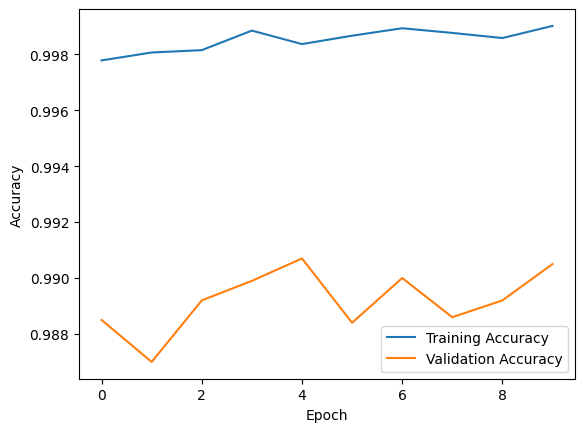

313/313 [==============================] - 1s 2ms/step


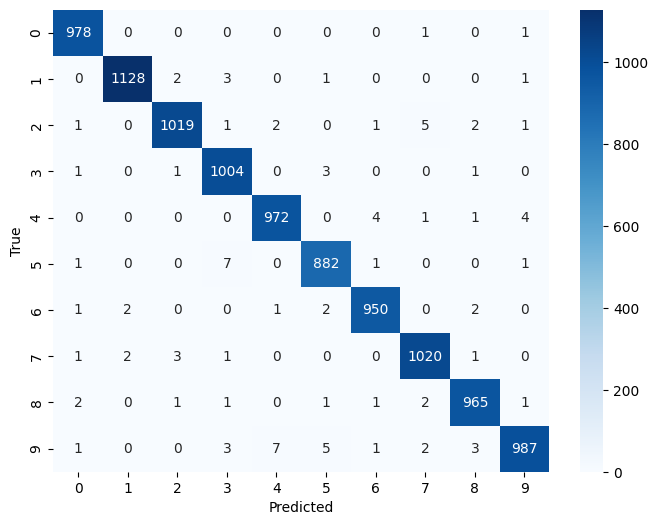

In [18]:
# Example code for plotting learning curves
import matplotlib.pyplot as plt

# Train the model and get the history object
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot learning curves for training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Example code for plotting confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on test data
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Get the class labels with highest probabilities

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Save the Model so that we don't to retrain again

In [19]:
model.save('trained_model_updated.h5')

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



# Regularization

In [20]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import plotly.graph_objects as go

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Create the model with regularization
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))



Epoch 1/20
469/469 [==============================] - 10s 20ms/step - loss: 0.8458 - accuracy: 0.8548 - val_loss: 0.3200 - val_accuracy: 0.9633
Epoch 2/20
469/469 [==============================] - 9s 19ms/step - loss: 0.3857 - accuracy: 0.9344 - val_loss: 0.2466 - val_accuracy: 0.9688
Epoch 3/20
469/469 [==============================] - 9s 20ms/step - loss: 0.3284 - accuracy: 0.9439 - val_loss: 0.2262 - val_accuracy: 0.9670
Epoch 4/20
469/469 [==============================] - 9s 20ms/step - loss: 0.2973 - accuracy: 0.9481 - val_loss: 0.1938 - val_accuracy: 0.9763
Epoch 5/20
469/469 [==============================] - 10s 20ms/step - loss: 0.2793 - accuracy: 0.9517 - val_loss: 0.1857 - val_accuracy: 0.9760
Epoch 6/20
469/469 [==============================] - 9s 20ms/step - loss: 0.2613 - accuracy: 0.9545 - val_loss: 0.1762 - val_accuracy: 0.9765
Epoch 7/20
469/469 [==============================] - 9s 20ms/step - loss: 0.2507 - accuracy: 0.9565 - val_loss: 0.1678 - val_accuracy: 0.97

## Performing Data Visualization on Regularization

In [21]:
# Create interactive line plots for accuracy
fig_accuracy = go.Figure()

fig_accuracy.add_trace(go.Scatter(x=list(range(1, len(history.history['accuracy']) + 1)),
                                  y=history.history['accuracy'],
                                  mode='lines',
                                  name='Training Accuracy'))

fig_accuracy.add_trace(go.Scatter(x=list(range(1, len(history.history['val_accuracy']) + 1)),
                                  y=history.history['val_accuracy'],
                                  mode='lines',
                                  name='Validation Accuracy'))

fig_accuracy.update_layout(title='Training and Validation Accuracy',
                           xaxis_title='Epoch',
                           yaxis_title='Accuracy',
                           legend=dict(x=0.7, y=1))

fig_accuracy.show()

# Create interactive line plots for loss
fig_loss = go.Figure()

fig_loss.add_trace(go.Scatter(x=list(range(1, len(history.history['loss']) + 1)),
                              y=history.history['loss'],
                              mode='lines',
                              name='Training Loss'))

fig_loss.add_trace(go.Scatter(x=list(range(1, len(history.history['val_loss']) + 1)),
                              y=history.history['val_loss'],
                              mode='lines',
                              name='Validation Loss'))

fig_loss.update_layout(title='Training and Validation Loss',
                       xaxis_title='Epoch',
                       yaxis_title='Loss',
                       legend=dict(x=0.7, y=1))

fig_loss.show()
